In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.stats import mode

In [ ]:
# Memuat data dari file CSV
train_data = pd.read_csv('train (2).csv', header=0, sep=";")
test_data = pd.read_csv('test (1).csv', header=0, sep=";")
evaluation_data = pd.read_csv('evaluation.csv', header=0, sep=";")

In [ ]:
# Gabungkan data untuk pelatihan
data = pd.concat([train_data, test_data, evaluation_data])

In [ ]:
# Pra-pemrosesan: Menggunakan TF-IDF untuk ekstraksi fitur dari kolom 'text'
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(data['text']).toarray()

In [ ]:
# Label yang benar (ground truth)
labels_true = data['label'].values

In [ ]:
# Latih model KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Evaluasi menggunakan Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels_true, kmeans.labels_)
print(f'Adjusted Rand Index (ARI): {ari}')

Adjusted Rand Index (ARI): 0.1203844947658321


In [ ]:
# Hitung silhouette score pada data X
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.007260015295451021


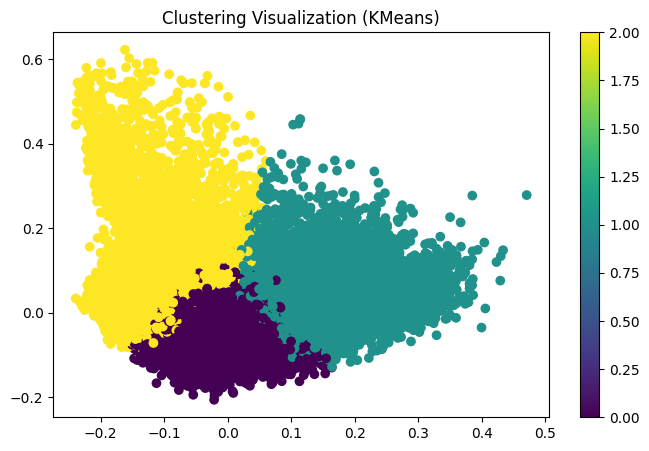

In [ ]:
# Visualisasi Clustering dengan PCA (Untuk mereduksi dimensi ke 2D)
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

# Visualisasi hasil clustering dalam 2D
plt.figure(figsize=(8, 5))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering Visualization (KMeans)')
plt.colorbar()
plt.show()